In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

### 分类树天生不擅长环形数据
##### 最擅长月亮形数据的是最近邻算法，RBF支持向量机和高斯过程
##### 最擅长环形数据的是最近邻算法和高斯过程
##### 最擅长对半分的数据的是朴素贝叶斯，神经网络和随机森林

In [2]:
wine = load_wine()
wine_data = wine.data
print(wine_data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
wine.keys

<function Bunch.keys>

In [6]:
import pandas as pd
d = pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis = 1)
print(d.head())

      0     1     2     3      4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

       12  0   
0  1065.0   0  
1  1050.0   0  
2  1185.0   0  
3  1480.0   0  
4   735.0   0  


In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
# 百分之三十作为测试集, data为输入特征，target为目标特征，注意变量顺序
# train_test_split：随机划分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [10]:
Xtrain.shape

(124, 13)

In [11]:
Xtest.shape

(54, 13)

In [12]:
Ytrain

array([0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1,
       1, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1,
       1, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1,
       1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2])

In [20]:
# 1.实例化
# 决策树模型如何进化，再分枝上的本质都还是追求某个不纯度相关的指标的优化。而不纯度是基于节点来计算的，
# 也就是说，决策树在建树的时候，是靠优化节点来追求一颗优化的树，但最优的节点能够保证最优的树吗？
# sklearn：既然一棵树不能保证最优，那就建更多的不同的树，然后从中取最好的。
# 在每次分枝时，不使用全部特征，而是随机选取一部分特征，从中选取不纯度相关指标最优的作为分枝用的节点。这样，每次生成的树也就不同了。
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                 ,random_state=35 # 来设置分枝中随机模式的参数，在高纬度时随机性会表现更明显。
                                 ,splitter='best' # 也是控制决策树中的随机选项，2个输入参数
        # 1.best,决策树在分枝时虽然随机选择，但优先选择更重要的特征进行分枝（feature_importances_）
        # 2.random,分枝时更加随机，树会更深，对训练集的拟合将会降低，是防止过拟合的一种方式
                                 )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) # 返回预测的准确度accuracy（测试集）
print(score)

0.9259259259259259


In [14]:
# 可视化决策树
import graphviz
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','稀释葡萄酒','脯氨酸']
# 建好的模型（clf）
dot_data = tree.export_graphviz(clf
                                ,feature_names = wine.feature_names
                                ,class_names = ["AAA","BBB","CCC"]
                                ,filled = True  # 是否填充颜色，颜色越深，不纯度越低
                                ,rounded = True  # 边框的形状
                                )
graph = graphviz.Source(dot_data)

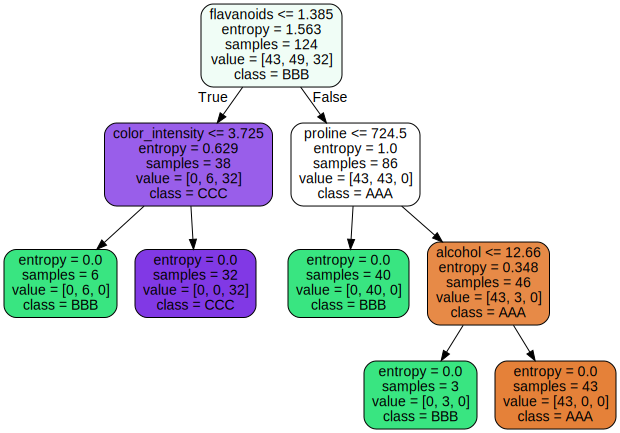

In [15]:
%matplotlib inline
graph

In [16]:
clf.feature_importances_  # 特征对决策树的重要性

array([0.08252728, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.43306664, 0.        , 0.        , 0.12333754,
       0.        , 0.        , 0.36106854])

In [17]:
# 根节点对决策树的贡献永远是最高的
[*zip(wine.feature_names, clf.feature_importances_)]

[('alcohol', 0.08252727872471466),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.4330666378965281),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.12333753979116642),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.36106854358759094)]

# 剪枝参数
在不加限制的情况下，一颗决策树会生长到衡量不纯度的指标最优，或者没有更多的特征可用为止。这样的决策树往往会过拟合。
-----在训练集上表现很好，在测试集上却表现糟糕。

In [21]:
# 检测对训练集的拟合程度
# 可以认为有轻微的过拟合，因为在训练集上表现比测试集合上要好
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

**为了让决策树有更好的泛化性，要对决策树进行剪枝。**
<p>正确的剪枝是优化决策树算法的核心。<br /> 

<p> max_depth: 限制树的最大深度，超过设定深度的树枝全部剪掉。实际使用时，建议从=3开始尝试，看结果再决定是否增加设定深度。<br />
<p> min_samples_leaf：限定子节点，一般搭配max_depth使用，一般从=5开始使用，或建议输入浮点数作为样本量的百分比来使用<br />
<p> min_samples_split: 一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝<br />

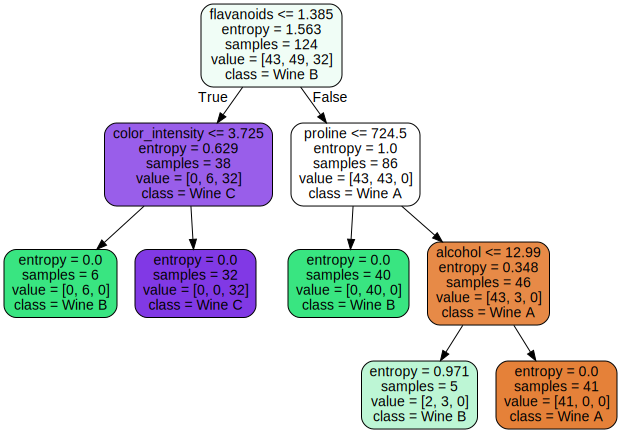

In [35]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=35 # 来设置分枝中随机模式的参数，在高纬度时随机性会表现更明显。
                                  ,splitter='best' # 也是控制决策树中的随机选项，2个输入参数
                                  ,max_depth=3
                                  ,min_samples_leaf=5
                                  ,min_samples_split=5
                                 )
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf
                                ,feature_names = wine.feature_names
                                ,class_names = ["Wine A","Wine B","Wine C"]
                                ,filled = True  # 是否填充颜色，颜色越深，不纯度越低
                                ,rounded = True  # 边框的形状
                                )
graph = graphviz.Source(dot_data)
graph

In [36]:
score = clf.score(Xtest, Ytest)
score

0.9444444444444444

<p>一般max_depth使用，用作树的“精修” <br />
<p>max_features限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃，和max_depth类似。用来限制高纬度数据的过拟合的剪枝参数，但其方法比较暴力，是直接限制可以使用的特征数量而强行使决策树停下的参数。因此，在不知道决策树中各个特征的重要性的情况下，强行设定这个参数可能会导致模型学习不足。<br />
如果希望通过降维的方式防止过拟合，建议使用PCA，ICA或特征选择模块中的降维算法。
<p>min_impurity_decrease：限制信息增益的大小，信息增益小于设定数值的分枝不会发生。 <br />

# 确认最优的剪枝参数
使用超参数的曲线进行判断

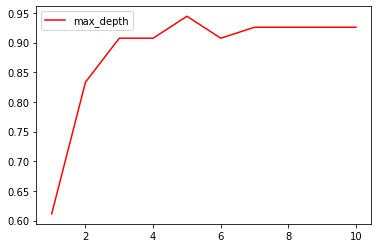

In [39]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                      ,criterion="entropy"
                                      ,random_state=35 # 来设置分枝中随机模式的参数，在高纬度时随机性会表现更明显。
                                      ,splitter="random"
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11), test, color = "red", label="max_depth")
plt.legend()
plt.show()

# 目标权重参数（了解）
完成样本标签平衡的参数。样本不平衡是指在一组数据集中，标签的一类天生占有很大的比例。比如，是和否比例为1：99.在这种分类状况下，即便模型什么也不做，把结果全部预测为否，正确率也有99%。
### class_weight
要使用class_weight参数对样本标签进行一定的均衡，给少量的标签更多的权重，让模型更偏向少数类，向捕获少数类的方向建模。默认none，给所有标签相同的权重。（自动处理）
### min_weight_fraction_leaf
配合使用

# 重要属性和接口
**所有接口中要求输入的X_train和X_test的部分，输入的特征矩阵必须至少是一个二维矩阵。sklearn不接受任何一维矩阵作为特征矩阵被输入。**

In [40]:
# apply 返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([10, 26, 26, 26, 13, 13, 21,  3, 17, 20, 21, 26, 13,  3, 13,  3, 13,
       13,  3, 10, 13, 24,  9, 10, 10, 24, 13, 26, 13,  3,  3, 26, 26, 13,
        3, 13, 13, 13, 15,  9,  3, 13, 26, 26, 26, 13, 13, 24,  3, 13,  3,
       13, 26,  3], dtype=int64)

In [41]:
# predict返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0,
       1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0,
       0, 1, 1, 0, 2, 1, 2, 1, 0, 2])